In [1]:
import sys
import os
import scrublet as scr
import scipy.io
import pandas as pd
import scipy.io
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
import umap
import numba
import numba.typed

# If using a Jupyter notebook, include the line %matplotlib inline below the imports.
%matplotlib inline

In [ ]:
# error: Illegal instruction (core dumped) on r5a.8xlarge
# Works on r5.16xlarge

### D0_R1

Preprocessing...


/home/ubuntu/.local/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 11.9%
Estimated detectable doublet fraction = 52.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 22.6%
Elapsed time: 13.1 seconds


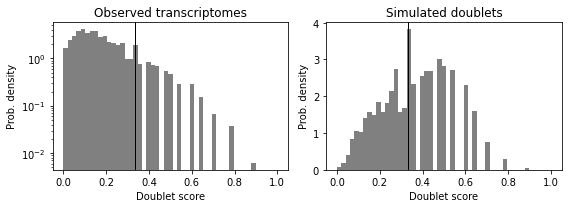

In [2]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/cvdc2_scRNA/data/D0_R1/"
outdir = "/volume/cvdc2_scRNA/data/scrublet_out/D0_R1/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

### Plotting and saving
scrub.plot_histogram();

In [ ]:
#scrub.call_doublets(threshold=0.23) # adjust the threshold if auto-detect doesn't work/doesn't look good

In [ ]:
#scrub.plot_histogram()

Running UMAP...
Done.


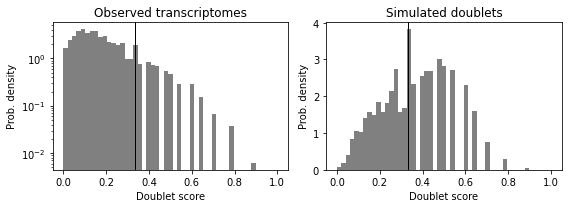

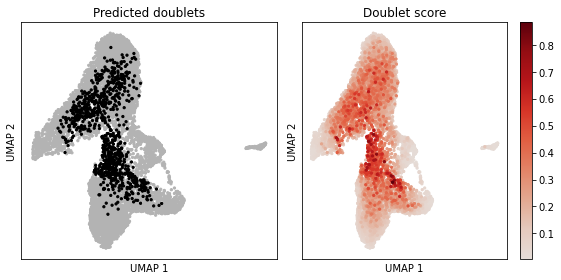

In [4]:
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)


### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

In [5]:
summary

,Classification,Droplet N
0,singlet,7023
1,doublet,948


### D21_EP_R2

Preprocessing...


/home/ubuntu/.local/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 5.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.2%
Elapsed time: 6.8 seconds


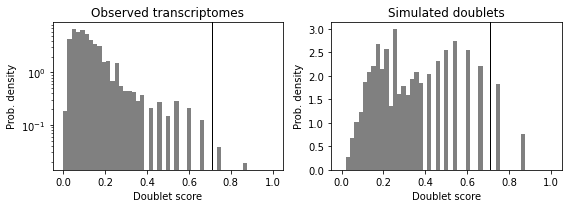

In [210]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/cvdc2_scRNA/data/D21_EP_R2/"
outdir = "/volume/cvdc2_scRNA/data/scrublet_out/D21_EP_R2/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

### Plotting and saving
scrub.plot_histogram();

In [215]:
scrub.call_doublets(threshold=0.26) # adjust the threshold if auto-detect doesn't work/doesn't look good

Detected doublet rate = 9.3%
Estimated detectable doublet fraction = 60.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.5%


array([False, False, False, ..., False, False,  True])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

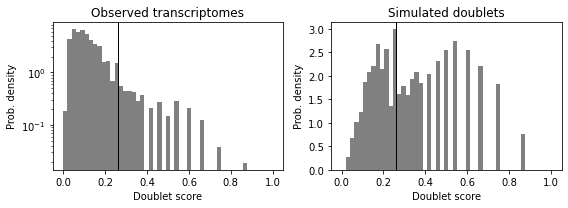

In [216]:
scrub.plot_histogram()

Running UMAP...
Done.


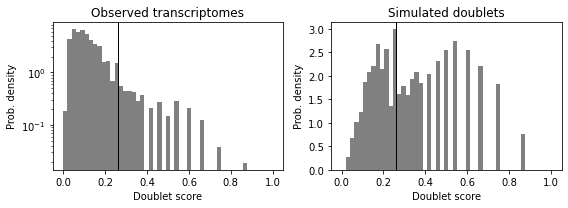

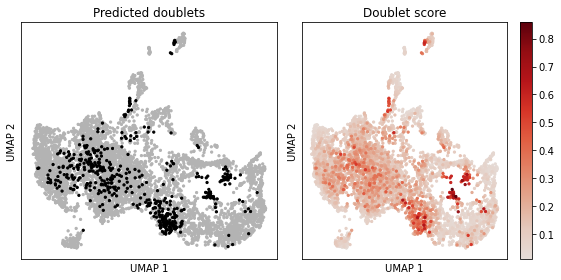

In [217]:
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)


### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

In [218]:
summary

,Classification,Droplet N
0,singlet,4752
1,doublet,489
